In [6]:
import librosa
#import librosa.display
import os
import IPython.display as ipd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load audio files

debussy_file = os.path.abspath('C:/Users/stur8980/Downloads/AudioSignalProcessingForML-master/8- Implementing the amplitude envelope/audio/debussy.wav')
redhot_file = os.path.abspath('C:/Users/stur8980/Downloads/AudioSignalProcessingForML-master/8- Implementing the amplitude envelope/audio/redhot.wav')
duke_file = os.path.abspath('C:/Users/stur8980/Downloads/AudioSignalProcessingForML-master/8- Implementing the amplitude envelope/audio/duke.wav')

In [ ]:
debussy_file

In [ ]:
ipd.Audio(debussy_file, rate=22050)

In [ ]:
os.getcwd()

In [ ]:
ipd.Audio(redhot_file, rate=22050)

In [ ]:
ipd.Audio(duke_file, rate=22050)

In [3]:
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [4]:
debussy

array([-0.01742554, -0.03567505, -0.04995728, ...,  0.00912476,
        0.00866699,  0.00964355], dtype=float32)

In [5]:
#load number of samples
debussy.size

661500

In [6]:
#duration of 1 sample
sample_duration = 1 / sr
print(f'Duration of 1 sample is: {sample_duration:.6f} seconds')

Duration of 1 sample is: 0.000045 seconds


In [8]:
#duration of audio signal in seconds

duration = sample_duration * len(debussy)
print(f'Duration of signal is: {duration:.2f} seconds')

Duration of signal is: 30.00 seconds


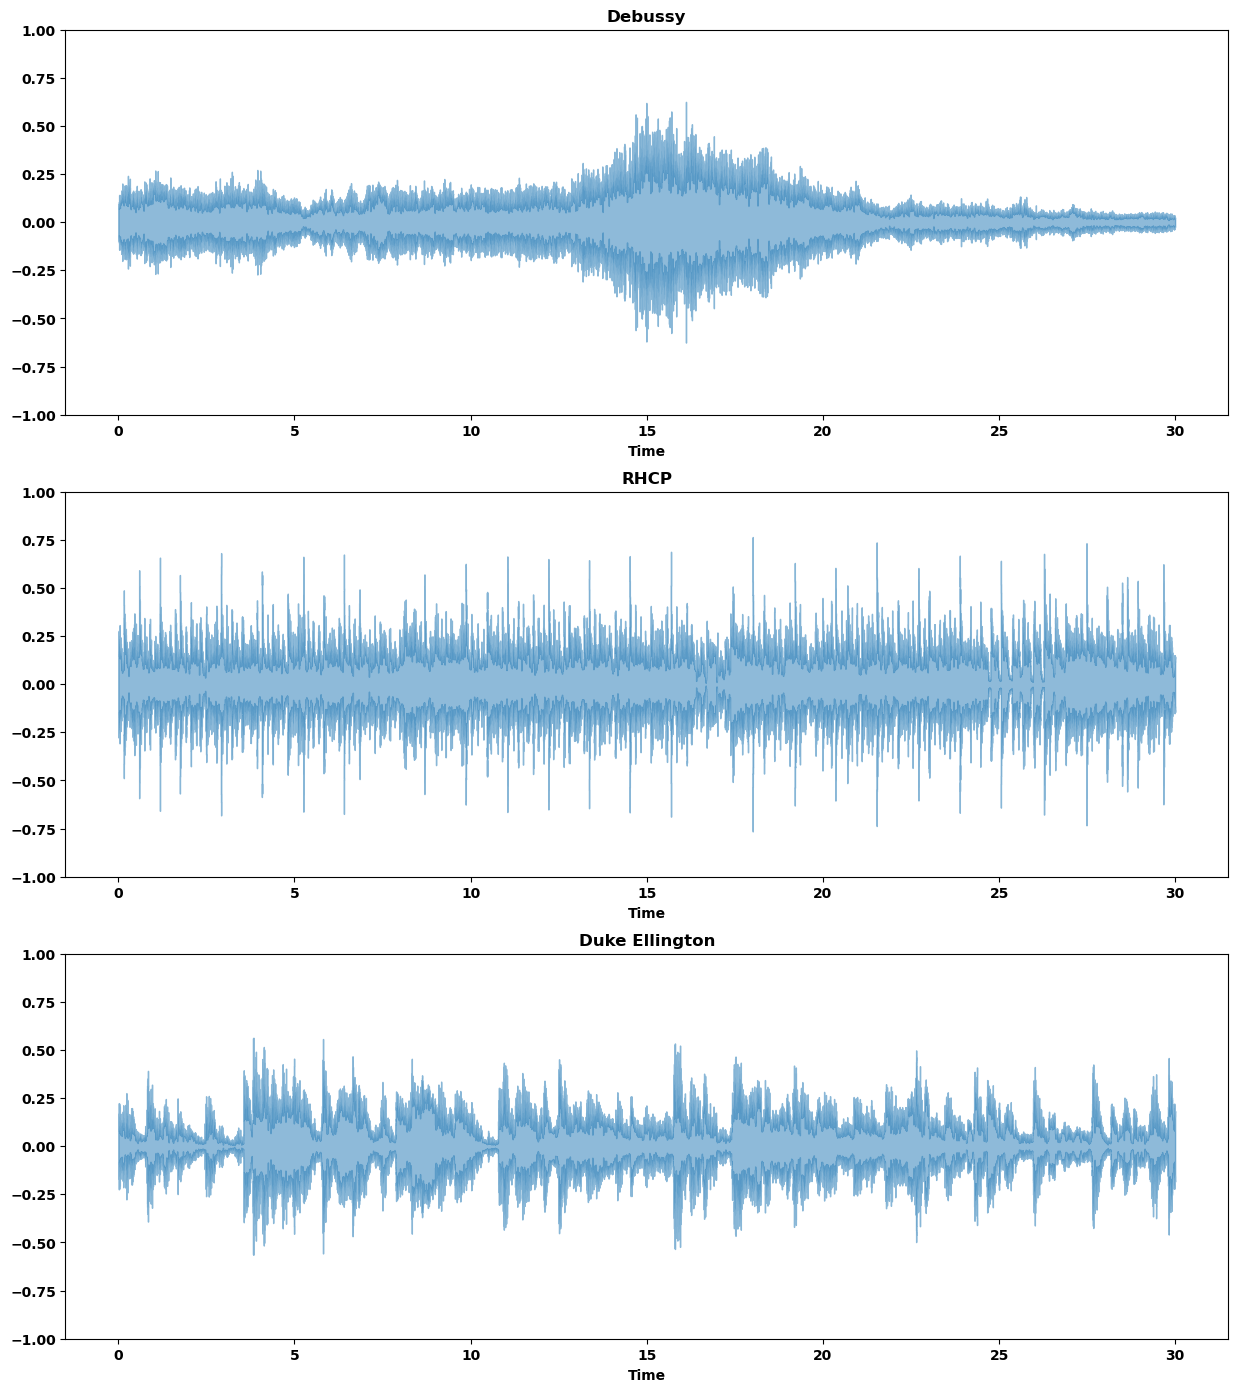

In [4]:
# visualize the waveforms

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1) # 3 rows, 1 col, index 1
librosa.display.waveshow(debussy, alpha=0.5)
plt.title("Debussy")
plt.ylim((-1,1))

plt.subplot(3, 1, 2) # 3 rows, 1 col, index 2
librosa.display.waveshow(redhot, alpha=0.5)
plt.title("RHCP")
plt.ylim((-1,1))

plt.subplot(3, 1, 3) # 3 rows, 1 col, index 3
librosa.display.waveshow(duke, alpha=0.5)
plt.title("Duke Ellington")
plt.ylim((-1,1))

plt.show()

In [9]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

# calculate the amplitude envolope 

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    # calclate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)

In [15]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [11]:
# Number of frames in debussy signal 
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
len(ae_debussy)

1292

In [16]:
fancy_ae_debussy = fancy_amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
len(fancy_ae_debussy)

1292

In [17]:
(ae_debussy == fancy_ae_debussy).all()

True

In [18]:
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)

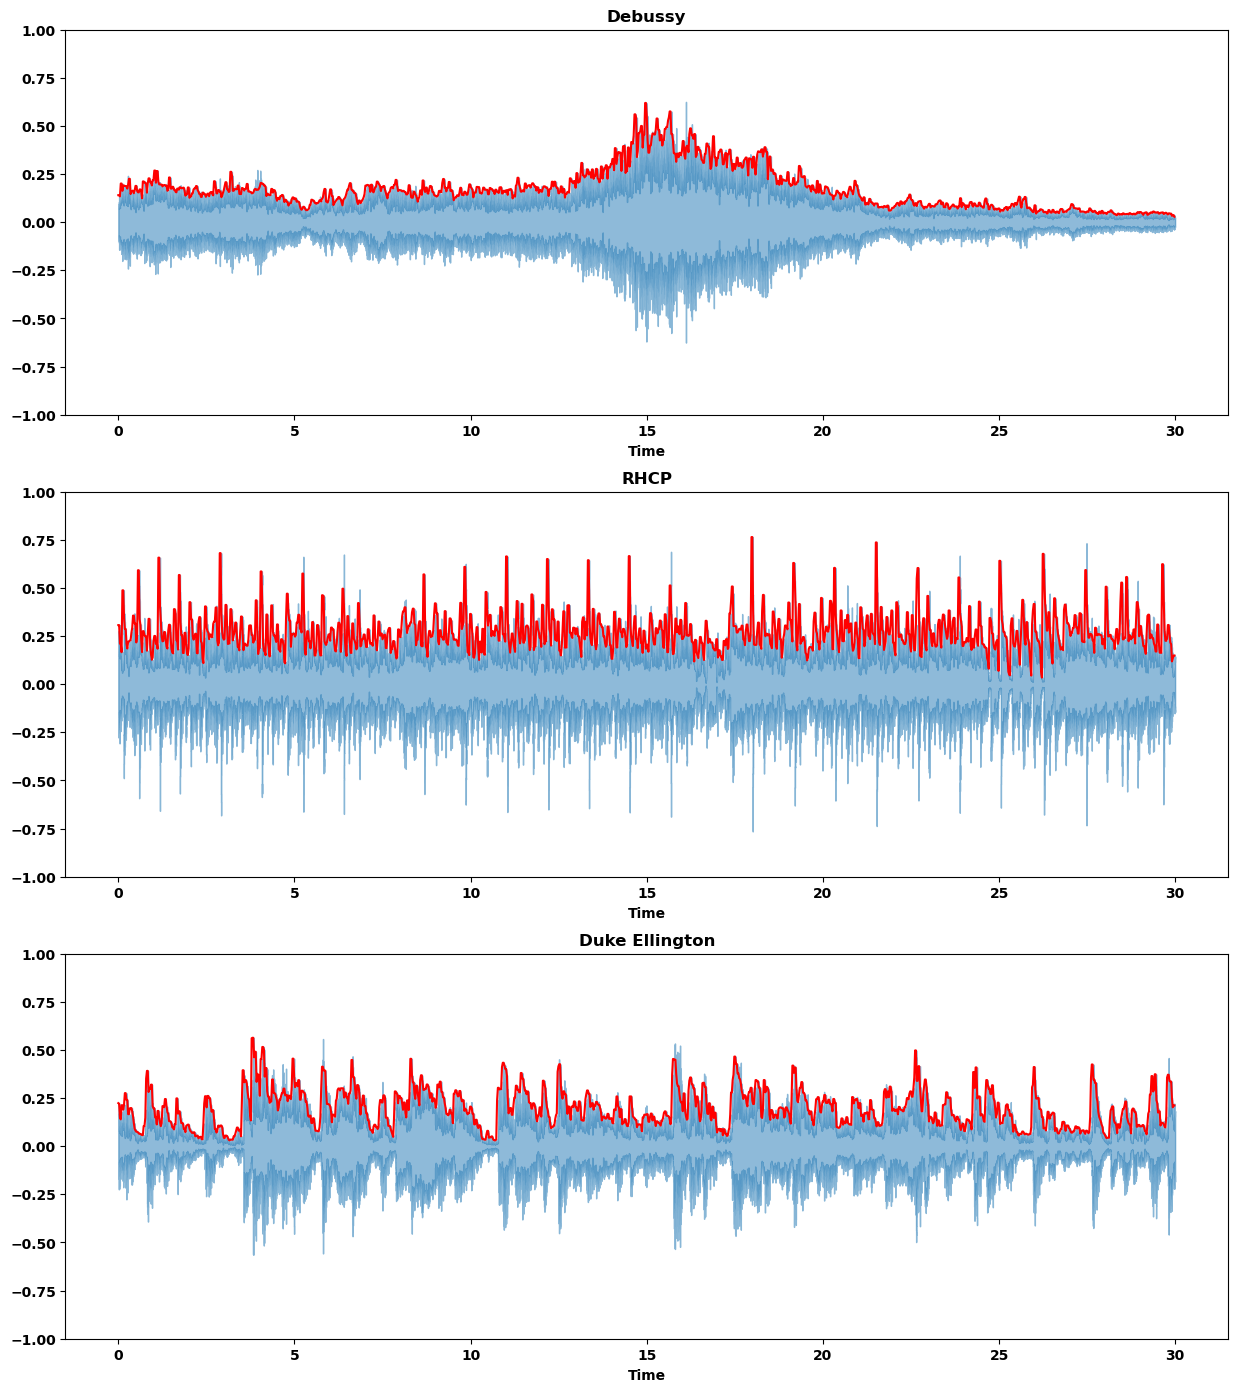

In [19]:
# visualize amplitude envelope for all the audio files

frames = range(0, ae_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1) # 3 rows, 1 col, index 1
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.title("Debussy")
plt.ylim((-1,1))

plt.subplot(3, 1, 2) # 3 rows, 1 col, index 2
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.title("RHCP")
plt.ylim((-1,1))

plt.subplot(3, 1, 3) # 3 rows, 1 col, index 3
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.title("Duke Ellington")
plt.ylim((-1,1))

plt.show()